<a href="https://colab.research.google.com/github/rpatel0022/Email-Spam-Classifier/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import pandas as pd

# Define the path to the zip file
zip_file_path = "/content/drive/MyDrive/archive.zip"

# Define the directory to extract to
extracted_dir = "/content/temp_extracted"

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Assuming there's a single CSV file in the zip, find its path
# You might need to adjust this if there are multiple files or nested directories
import os
csv_files = [f for f in os.listdir(extracted_dir) if f.endswith('.csv')]

if csv_files:
    csv_file_path = os.path.join(extracted_dir, csv_files[0])
    # Load the CSV file into a pandas DataFrame
    try:
        df = pd.read_csv(csv_file_path, encoding='latin-1')
        print("CSV file loaded successfully!")
        display(df.head())
    except UnicodeDecodeError:
        print("Could not decode the file with 'latin-1' encoding. You might need to try a different encoding.")

else:
    print("No CSV files found in the extracted directory.")

CSV file loaded successfully!


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
import numpy as np
import pandas as pd


In [4]:
import pandas as pd

# Define the path to the spam.csv file
spam_csv_path = "/content/temp_extracted/spam.csv"

# Load the CSV file into a pandas DataFrame
try:
    spam_df = pd.read_csv(spam_csv_path, encoding='latin-1')
    print("spam.csv loaded successfully!")
    display(spam_df.head())
except FileNotFoundError:
    print(f"Error: {spam_csv_path} not found. Make sure the file was extracted correctly.")
except UnicodeDecodeError:
    print("Could not decode the file with 'latin-1' encoding. You might need to try a different encoding.")
except Exception as e:
    print(f"An error occurred: {e}")

spam.csv loaded successfully!


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
spam_df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2158,ham,I think you should go the honesty road. Call t...,NaN,NaN,NaN
3372,ham,Looks like you found something to do other tha...,NaN,NaN,NaN
1544,ham,After completed degree. There is no use in joi...,NaN,NaN,NaN
1121,spam,Do you want 750 anytime any network mins 150 t...,NaN,NaN,NaN
3122,ham,He telling not to tell any one. If so treat fo...,NaN,NaN,NaN


In [6]:
spam_df.shape

(5572, 5)

**1. Data Cleaning**

In [8]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
spam_df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
367,spam,Here is your discount code RP176781. To stop f...,NaN,NaN,NaN
323,ham,That would be great. We'll be at the Guild. Co...,NaN,NaN,NaN
4155,ham,"Yo, call me when you get the chance, a friend ...",NaN,NaN,NaN
2811,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",NaN,NaN,NaN
5122,ham,\NOT ENUFCREDEIT TOCALL.SHALL ILEAVE UNI AT 6 ...,NaN,NaN,NaN


In [10]:
spam_df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [11]:
spam_df.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
356,spam,Congratulations ur awarded 500 of CD vouchers ...,NaN,NaN,NaN
2076,ham,"Trust me. Even if isn't there, its there.",NaN,NaN,NaN
5104,ham,A Boy loved a gal. He propsd bt she didnt mind...,NaN,NaN,NaN
2110,ham,Do we have any spare power supplies,NaN,NaN,NaN
1923,ham,Hello. They are going to the village pub at 8 ...,NaN,NaN,NaN


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

spam_df['target'] = encoder.fit_transform(spam_df['target'])

In [13]:
spam_df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
spam_df.isnull().sum()

,0
target,0
text,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [15]:
#Checking for duplicates

spam_df.duplicated().sum()
spam_df = spam_df.drop_duplicates(keep='first')

In [16]:
spam_df.duplicated().sum()

np.int64(0)

2. **Exploratory Data Analysis**

In [17]:
spam_df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
spam_df['target'].value_counts()

,count
target,
0,4516
1,653


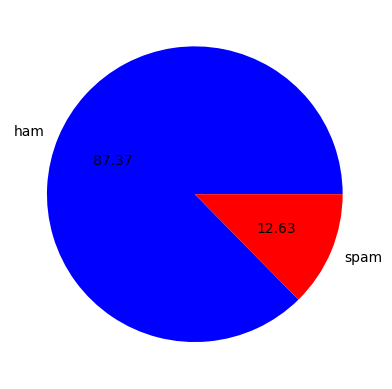

In [19]:
import matplotlib.pyplot as plt
plt.pie(spam_df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f", colors=['blue', 'red'])
plt.show()

In [20]:
!pip install nltk

In [21]:
import nltk #natural language tool kit
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
spam_df['num_characters'] = spam_df['text'].apply(len)

In [23]:
spam_df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [28]:
spam_df['num_words'] = spam_df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [30]:
spam_df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,2,24
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,2,37
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,1,15


In [31]:
spam_df['num_sentences'] = spam_df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
spam_df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,2,24
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,2,37
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,1,15


In [33]:
spam_df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
spam_df[spam_df['target'] == 0 ][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
spam_df[spam_df['target'] == 1 ][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

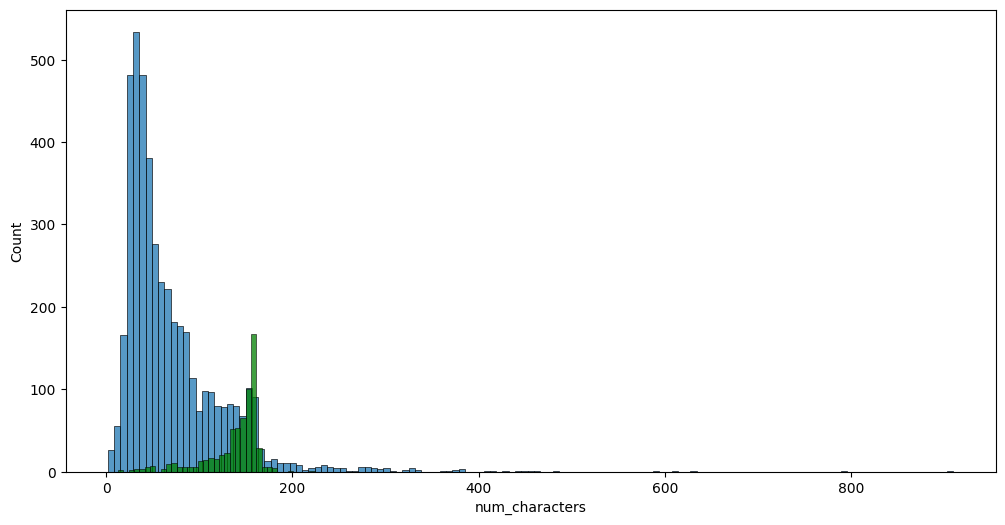

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(spam_df[spam_df['target'] == 0]['num_characters'])
sns.histplot(spam_df[spam_df['target'] == 1]['num_characters'], color='green')

<Axes: xlabel='num_words', ylabel='Count'>

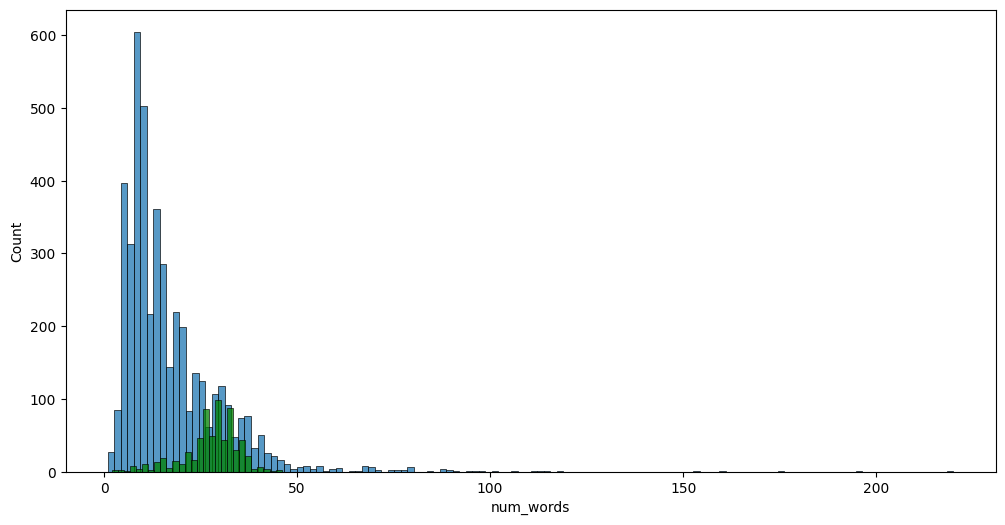

In [38]:
plt.figure(figsize=(12, 6))
sns.histplot(spam_df[spam_df['target'] == 0]['num_words'])
sns.histplot(spam_df[spam_df['target'] == 1]['num_words'], color='green')

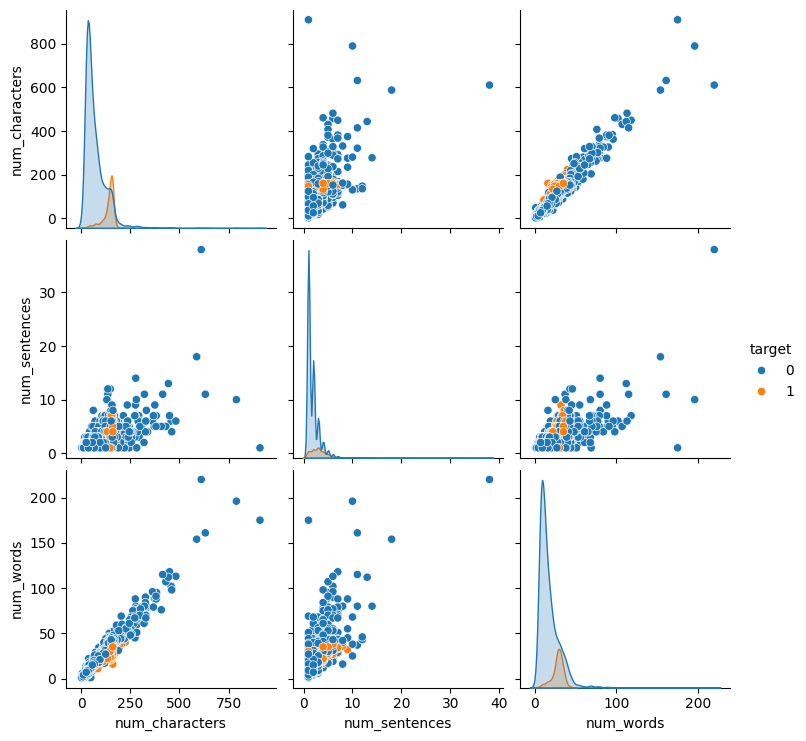

In [39]:
sns.pairplot(spam_df, hue='target')

In [40]:
spam_df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,2,24
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,2,37
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,1,15


<Axes: >

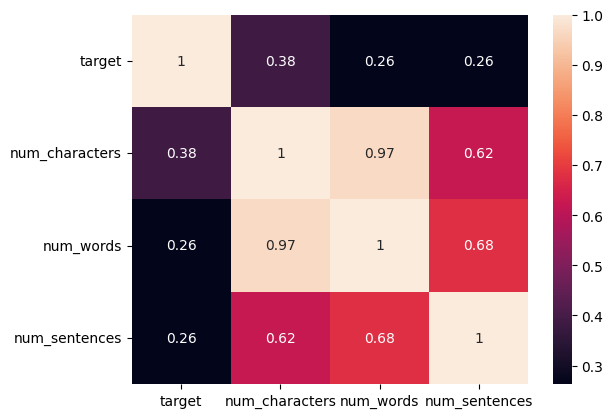

In [41]:
# Specify the desired order of columns
cols_order = ['target', 'num_characters', 'num_words', 'num_sentences']

# Calculate and plot the heatmap with the specified column order
sns.heatmap(spam_df[cols_order].corr(), annot=True)

In [ ]:
W

In [42]:
spam_df = spam_df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
spam_df.head()

,target,text,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [46]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Initialize the stemmer
ps = PorterStemmer()

# Download necessary NLTK resources (only needs to be run once)
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

3. Data Preprocessing

In [47]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [49]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [48]:
spam_df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [50]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [51]:
spam_df['transformed_text'] = spam_df['text'].apply(transform_text)


In [53]:
spam_df.head()


,target,text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [54]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [60]:
spam_wc = wc.generate(spam_df[spam_df['target'] == 1]['transformed_text'].str.cat(sep=" "))


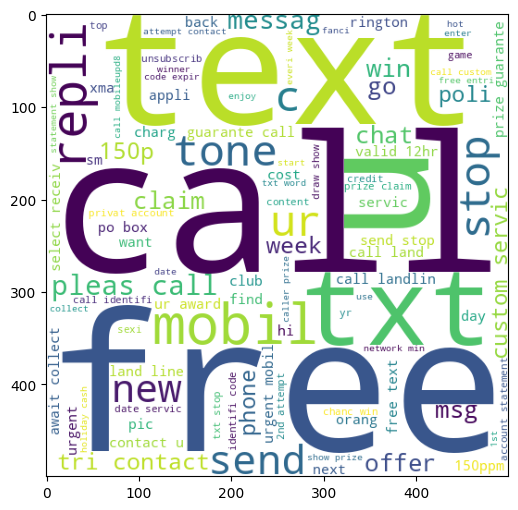

In [61]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [62]:
ham_wc = wc.generate(spam_df[spam_df['target'] == 0]['transformed_text'].str.cat(sep=" "))


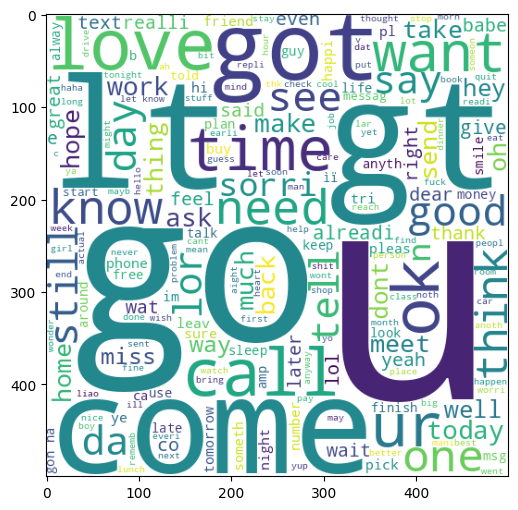

In [63]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [64]:
spam_df.head()

,target,text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [65]:
spam_corpus = []
for msg in spam_df[spam_df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [66]:
len(spam_corpus)


9939

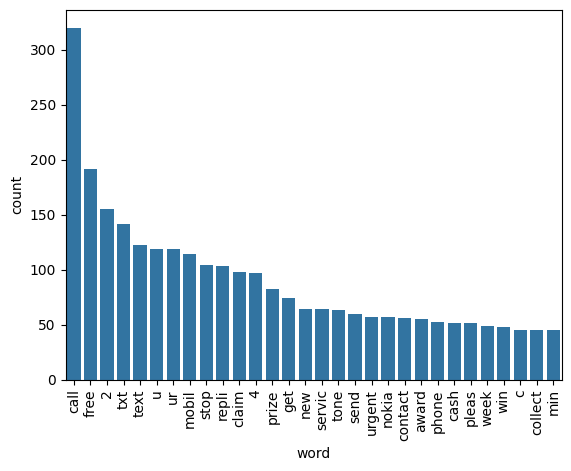

In [79]:
from collections import Counter
temp_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(data=temp_df, x='word', y='count')
plt.xticks(rotation='vertical')
plt.show()

In [80]:
ham_corpus = []
for msg in spam_df[spam_df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [81]:
len(ham_corpus)

35404

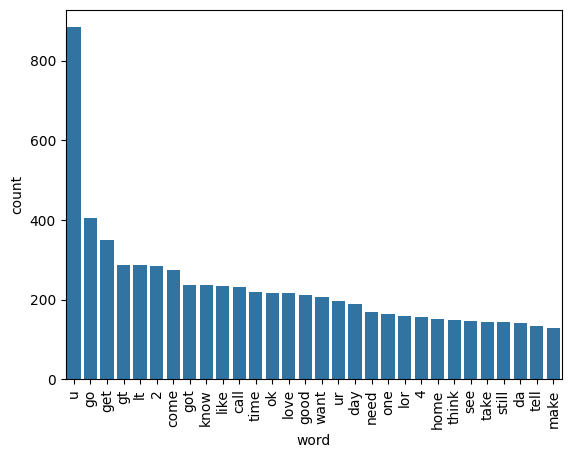

In [82]:
from collections import Counter
temp_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(data=temp_df, x='word', y='count')
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [103]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

tfidf = TfidfVectorizer()


In [104]:
X = tfidf.fit_transform(spam_df['transformed_text']).toarray()

In [105]:
X.shape

(5169, 6708)

In [106]:
y = spam_df['target'].values

In [107]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [110]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [111]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [112]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [113]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [114]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
#tfidf performs well with mnb due to precision score. Which matters a lot in this case.

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [116]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [117]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [118]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [119]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9729206963249516, 0.9741379310344828)

In [120]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9516129032258065


In [121]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [122]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
10,xgb,0.974855,0.951613
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
6,AdaBoost,0.924565,0.840909


In [123]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [124]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,xgb,Accuracy,0.974855
6,LR,Accuracy,0.951644
7,GBDT,Accuracy,0.952611
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


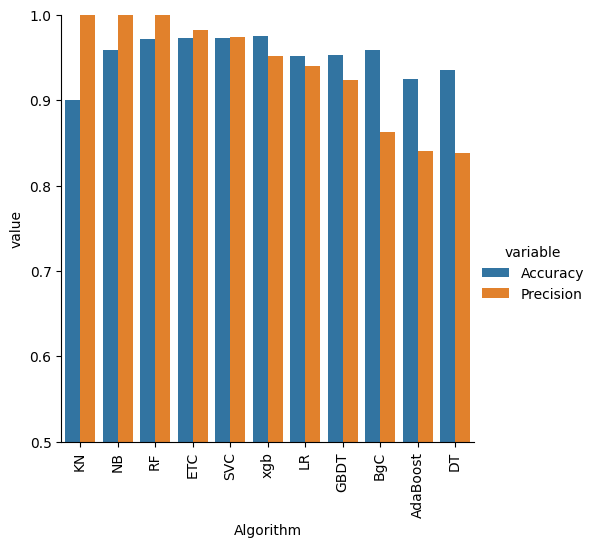

In [125]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()